# 20201221_Statistics_v1

# Import Packages

In [15]:
import os
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
import statistics as stat
import matplotlib.pyplot as plt
from matplotlib import pyplot

In [ ]:
import nltk
nltk.download()
nltk.download("stopwords")

In [21]:
###################################################

# FONCTIONS : 

def nettoyage(ch): 
    ch = ch.lower()
    car_spec = [',',';',':','/','-','_','\t','\n','^','<','>','"',
                '$','£','€','*','#','%','{','}','[',']','(',')','&',
                '+','=',"'"]
    for c in car_spec: 
        ch = ch.replace(c," ")
    car_fin = ['...','?','!','.']
    for c in car_fin: 
        ch = ch.replace(c," .")
    ch = ch.replace("  "," ")
    return ch

def nettoyage_stopwords(ch): 
    l = ch.split(" ")
    sw = stopwords.words('english') 
    l = [w for w in l if w not in sw]
    l=[x for x in l if x!='']
    l=[x for x in l if (x=='.' or len(x)!=1)] 
    l=[x for x in l if len(x)<20] 
    return " ".join(l)

def count_words(ch): 
    l = ch.split(" ")
    l=[x for x in l if x!='']
    l=[x for x in l if x!='.']
    return len(l)  

def count_unique_words(ch): 
    l = ch.split(" ")
    l=[x for x in l if x!='']
    l=[x for x in l if x!='.']
    l = np.array(l)
    return len(np.unique(l))

def count_sentences(ch): 
    return len(ch.split('. '))-1 

def longueur_mots(ch): 
    ch  =  ch.replace('.',' ')
    ch = ch.replace("  "," ")
    l = ch.split(" ")
    l=[x for x in l if x!='']
    l=[x for x in l if len(x)!=1]
    res = [] 
    for k in range(len(l)):
        res.append(len(l[k]))
    return [min(res),max(res),stat.mean(res),stat.median(res)]

def longueur_phrases(ch): 
    l = ch.split(". ") 
    res = [] 
    for k in range(len(l)): 
        l1 = l[k].split(" ") 
        l1=[x for x in l1 if x!='']
        l1=[x for x in l1 if len(x)!=1]
        res.append(len(l1))
    return [min(res),max(res),stat.mean(res),stat.median(res)]


# Corpus I Import

In [17]:
df_corpus_I_v1 = pd.read_csv('../Corpus I/20201221_Corpus_I_v2.csv')
df_corpus_I_v1 = df_corpus_I_v1.loc[:, ~df_corpus_I_v1.columns.str.contains('^Unnamed')]
df_corpus_I_v1.head(3)

,Newspaper,Date,Reviewer,Title,Review,Author,Theatre,Opening,Closing,Director
0,﻿﻿THE TIMES,2010-06-01,NaN,NaN,Benedict Nightingale This dinky little musical...,NaN,8.1.10,NaN,NaN,NaN
1,GUARDIAN,2010-07-01,Michael Billington,NaN,Sam Walters clearly has a soft spot for this ...,NaN,8.1.10,NaN,NaN,NaN
2,DAILY TELEGRAPH,2010-07-01,Charles Spencer,NaN,"Unbelievably, The Lady or the Tiger is one of...",NaN,8.1.10,NaN,NaN,NaN


# Corpus II Import

In [18]:
df_corpus_II_v1 = pd.read_csv('../Corpus II/20201221_Corpus_II_v1.csv')
df_corpus_II_v1 = df_corpus_II_v1.loc[:, ~df_corpus_II_v1.columns.str.contains('^Unnamed')]
df_corpus_II_v1.head(3)

,Newspaper,Date,Reviewer,Title,Theatre,Rating,Keywords,Review,Author,Opening,Closing,Director,Categories,Theatre,Reviewer.1
0,A YOUNGER THEATER,2020-11-12 00:00:00,Jessica Handscomb,The Dumb Waiter,Hampstead Theatre,★★★★,"Alec Newman,Alice Hamilton,Harold Pinter,James...",\nI think it’s fair to say that 2020 has been ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A YOUNGER THEATER,2020-10-12 00:00:00,Jessica Handscomb,Mr Stink,Chickenshed Theatre,★★★,"Belinda McGuirk,Bethany Hamlin,Bradley Davis,C...",\nDavid Walliams is not my favourite children’...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A YOUNGER THEATER,2020-08-12 00:00:00,Olivia Kiely,The Gruffalo’s Child,Tall Stories,★★★,"Alexandra Palace,Althea Burey,Andy Shaw,Axel S...",\nIt is fair to say that I’m a bit older than ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Corpus I Clean-up

In [23]:
# Corpus I
Corpus_I_review_clean = []
Corpus_I_review_nostop = []
for k in df_corpus_I_v1.axes[0]: 
    if pd.isna(df_corpus_I_v1['Review'][k]):
        Corpus_I_review_clean.append(None)
        Corpus_I_review_nostop.append(None)
    else: 
        Corpus_I_review_clean.append(nettoyage(df_corpus_I_v1['Review'][k]))
        Corpus_I_review_nostop.append(nettoyage_stopwords(Corpus_I_review_clean[-1]))
df_corpus_I_v1['Review_clean'] = Corpus_I_review_clean
df_corpus_I_v1['Review_no_stopword'] = Corpus_I_review_nostop
df_corpus_I_v1.head(3)

,Newspaper,Date,Reviewer,Title,Review,Author,Theatre,Opening,Closing,Director,Review_clean,Review_no_stopword
0,﻿﻿THE TIMES,2010-06-01,NaN,NaN,Benedict Nightingale This dinky little musical...,NaN,8.1.10,NaN,NaN,NaN,benedict nightingale this dinky little musical...,benedict nightingale dinky little musical spec...
1,GUARDIAN,2010-07-01,Michael Billington,NaN,Sam Walters clearly has a soft spot for this ...,NaN,8.1.10,NaN,NaN,NaN,sam walters clearly has a soft spot for this ...,sam walters clearly soft spot toothless musica...
2,DAILY TELEGRAPH,2010-07-01,Charles Spencer,NaN,"Unbelievably, The Lady or the Tiger is one of...",NaN,8.1.10,NaN,NaN,NaN,unbelievably the lady or the tiger is one of ...,unbelievably lady tiger one orange tree’s bigg...


# Corpus II Clean-up

In [24]:
# Corpus II

Corpus_II_review_clean = []
Corpus_II_review_nostop = []
for k in df_corpus_II_v1.axes[0]: 
    if pd.isna(df_corpus_II_v1['Review'][k]):
        Corpus_II_review_clean.append(None)
        Corpus_II_review_nostop.append(None)
    else: 
        Corpus_II_review_clean.append(nettoyage(df_corpus_II_v1['Review'][k]))
        Corpus_II_review_nostop.append(nettoyage_stopwords(Corpus_II_review_clean[-1]))
df_corpus_II_v1['Review_clean'] = Corpus_II_review_clean
df_corpus_II_v1['Review_no_stopword'] = Corpus_II_review_nostop
df_corpus_II_v1.head(3)

,Newspaper,Date,Reviewer,Title,Theatre,Rating,Keywords,Review,Author,Opening,Closing,Director,Categories,Theatre,Reviewer.1,Review_clean,Review_no_stopword
0,A YOUNGER THEATER,2020-11-12 00:00:00,Jessica Handscomb,The Dumb Waiter,Hampstead Theatre,★★★★,"Alec Newman,Alice Hamilton,Harold Pinter,James...",\nI think it’s fair to say that 2020 has been ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,i think it’s fair to say that 2020 has been m...,think it’s fair say 2020 mostly horrendous esp...
1,A YOUNGER THEATER,2020-10-12 00:00:00,Jessica Handscomb,Mr Stink,Chickenshed Theatre,★★★,"Belinda McGuirk,Bethany Hamlin,Bradley Davis,C...",\nDavid Walliams is not my favourite children’...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,david walliams is not my favourite children’s...,david walliams favourite children’s author i’d...
2,A YOUNGER THEATER,2020-08-12 00:00:00,Olivia Kiely,The Gruffalo’s Child,Tall Stories,★★★,"Alexandra Palace,Althea Burey,Andy Shaw,Axel S...",\nIt is fair to say that I’m a bit older than ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,it is fair to say that i’m a bit older than t...,fair say i’m bit older gruffalo’s child’s targ...


In [26]:
# Comparaisons : 

Corpus_I_nb_mots = []
Corpus_I_nb_mots_nostop = []
Corpus_I_nb_phrases = []
for k in df_corpus_I_v1.axes[0]: 
    if pd.isna(df_corpus_I_v1['Review'][k])==False:
        Corpus_I_nb_mots.append(count_words(df_corpus_I_v1['Review_clean'][k]))
        Corpus_I_nb_mots_nostop.append(count_words(df_corpus_I_v1['Review_no_stopword'][k]))
        Corpus_I_nb_phrases.append(count_sentences(df_corpus_I_v1['Review_clean'][k]))
    
Corpus_II_nb_mots = []
Corpus_II_nb_mots_nostop = []
Corpus_II_nb_phrases = []
for k in df_corpus_II_v1.axes[0]: 
    if pd.isna(df_corpus_II_v1['Review'][k])==False:
        Corpus_II_nb_mots.append(count_words(df_corpus_II_v1['Review_clean'][k]))
        Corpus_II_nb_mots_nostop.append(count_words(df_corpus_II_v1['Review_no_stopword'][k]))
        Corpus_II_nb_phrases.append(count_sentences(df_corpus_II_v1['Review_clean'][k]))




Text(0.5, 1.0, 'Number of Words in Reviews')

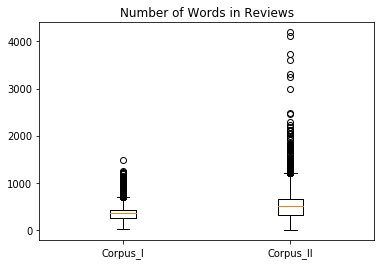

In [27]:
pyplot.boxplot([Corpus_I_nb_mots,Corpus_II_nb_mots])
pyplot.gca().xaxis.set_ticklabels(["Corpus_I", "Corpus_II"])
pyplot.title('Number of Words in Reviews')

Text(0.5, 1.0, 'Number of Words in Reviews')

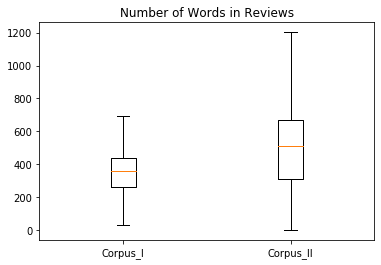

In [28]:
pyplot.boxplot([Corpus_I_nb_mots,Corpus_II_nb_mots],showfliers=False)
pyplot.gca().xaxis.set_ticklabels(["Corpus_I", "Corpus_II"])
pyplot.title('Number of Words in Reviews')

Text(0.5, 1.0, 'Number of Words in Reviews (Excluding Stopwords)')

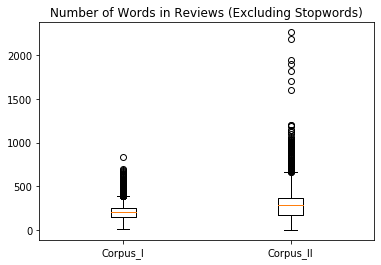

In [29]:
pyplot.boxplot([Corpus_I_nb_mots_nostop,Corpus_II_nb_mots_nostop])
pyplot.gca().xaxis.set_ticklabels(["Corpus_I", "Corpus_II"])
pyplot.title('Number of Words in Reviews (Excluding Stopwords)')

Text(0.5, 1.0, 'Number of Words in Reviews (Excluding Stopwords)')

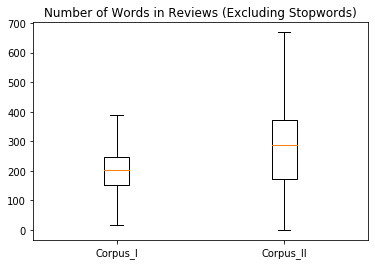

In [30]:
pyplot.boxplot([Corpus_I_nb_mots_nostop,Corpus_II_nb_mots_nostop],showfliers=False)
pyplot.gca().xaxis.set_ticklabels(["Corpus_I", "Corpus_II"])
pyplot.title('Number of Words in Reviews (Excluding Stopwords)')

Text(0.5, 1.0, 'Number of Sentences in Reviews')

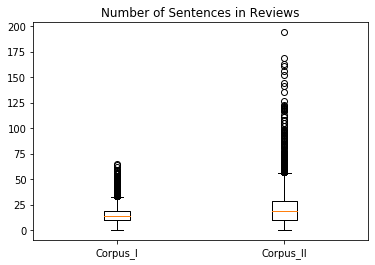

In [31]:
pyplot.boxplot([Corpus_I_nb_phrases,Corpus_II_nb_phrases])
pyplot.gca().xaxis.set_ticklabels(["Corpus_I", "Corpus_II"])
pyplot.title('Number of Sentences in Reviews')

Text(0.5, 1.0, 'Number of Sentences in Reviews')

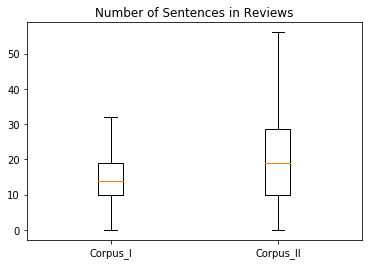

In [32]:
pyplot.boxplot([Corpus_I_nb_phrases,Corpus_II_nb_phrases],showfliers=False)
pyplot.gca().xaxis.set_ticklabels(["Corpus_I", "Corpus_II"])
pyplot.title('Number of Sentences in Reviews')

In [46]:
# More stats : 

Corpus_I_mot_min = []
Corpus_I_mot_max = []
Corpus_I_mot_moy = []
Corpus_I_mot_med = []
Corpus_I_phr_min = []
Corpus_I_phr_max = []
Corpus_I_phr_moy = []
Corpus_I_phr_med = [] 

for k in df_corpus_I_v1.axes[0]:
    if pd.isna(df_corpus_I_v1['Review'][k])==False:
        Corpus_I_mot_min.append(longueur_mots(df_corpus_I_v1['Review_no_stopword'][k])[0])
        Corpus_I_mot_max.append(longueur_mots(df_corpus_I_v1['Review_no_stopword'][k])[1])
        Corpus_I_mot_moy.append(longueur_mots(df_corpus_I_v1['Review_no_stopword'][k])[2])
        Corpus_I_mot_med.append(longueur_mots(df_corpus_I_v1['Review_no_stopword'][k])[3])
        Corpus_I_phr_min.append(longueur_phrases(df_corpus_I_v1['Review_no_stopword'][k])[0])
        Corpus_I_phr_max.append(longueur_phrases(df_corpus_I_v1['Review_no_stopword'][k])[1])
        Corpus_I_phr_moy.append(longueur_phrases(df_corpus_I_v1['Review_no_stopword'][k])[2])
        Corpus_I_phr_med.append(longueur_phrases(df_corpus_I_v1['Review_no_stopword'][k])[3])

Corpus_II_mot_min = []
Corpus_II_mot_max = []
Corpus_II_mot_moy = []
Corpus_II_mot_med = []
Corpus_II_phr_min = []
Corpus_II_phr_max = []
Corpus_II_phr_moy = []
Corpus_II_phr_med = [] 

for k in df_corpus_II_v1.axes[0]:
    if pd.isna(df_corpus_II_v1['Review'][k])==False:
        if df_corpus_II_v1['Review_no_stopword'][k] != '':
            if df_corpus_II_v1['Review_no_stopword'][k] != '.':
                Corpus_II_mot_min.append(longueur_mots(df_corpus_II_v1['Review_no_stopword'][k])[0])
                Corpus_II_mot_max.append(longueur_mots(df_corpus_II_v1['Review_no_stopword'][k])[1])
                Corpus_II_mot_moy.append(longueur_mots(df_corpus_II_v1['Review_no_stopword'][k])[2])
                Corpus_II_mot_med.append(longueur_mots(df_corpus_II_v1['Review_no_stopword'][k])[3])
                Corpus_II_phr_min.append(longueur_phrases(df_corpus_II_v1['Review_no_stopword'][k])[0])
                Corpus_II_phr_max.append(longueur_phrases(df_corpus_II_v1['Review_no_stopword'][k])[1])
                Corpus_II_phr_moy.append(longueur_phrases(df_corpus_II_v1['Review_no_stopword'][k])[2])
                Corpus_II_phr_med.append(longueur_phrases(df_corpus_II_v1['Review_no_stopword'][k])[3])



Text(0.5, 1.0, 'Minimum Word Length in Reviews')

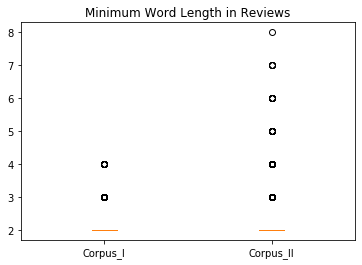

In [47]:
pyplot.boxplot([Corpus_I_mot_min,Corpus_II_mot_min])
pyplot.gca().xaxis.set_ticklabels(["Corpus_I", "Corpus_II"])
pyplot.title('Minimum Word Length in Reviews')

Text(0.5, 1.0, 'Minimum Word Length in Reviews')

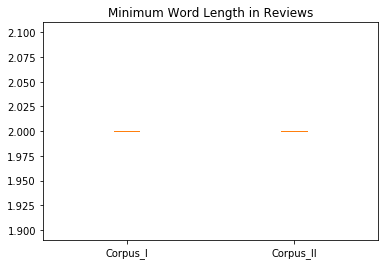

In [48]:
pyplot.boxplot([Corpus_I_mot_min,Corpus_II_mot_min],showfliers=False)
pyplot.gca().xaxis.set_ticklabels(["Corpus_I", "Corpus_II"])
pyplot.title('Minimum Word Length in Reviews')

Text(0.5, 1.0, 'Maximum Word Length in Reviews')

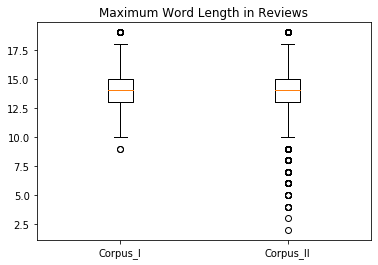

In [49]:
pyplot.boxplot([Corpus_I_mot_max,Corpus_II_mot_max])
pyplot.gca().xaxis.set_ticklabels(["Corpus_I", "Corpus_II"])
pyplot.title('Maximum Word Length in Reviews')

Text(0.5, 1.0, 'Maximum Word Length in Reviews')

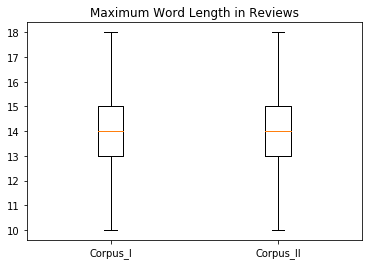

In [50]:
pyplot.boxplot([Corpus_I_mot_max,Corpus_II_mot_max],showfliers=False)
pyplot.gca().xaxis.set_ticklabels(["Corpus_I", "Corpus_II"])
pyplot.title('Maximum Word Length in Reviews')

Text(0.5, 1.0, 'Average Word Length in Reviews')

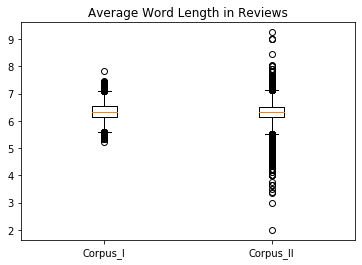

In [51]:
pyplot.boxplot([Corpus_I_mot_moy,Corpus_II_mot_moy])
pyplot.gca().xaxis.set_ticklabels(["Corpus_I", "Corpus_II"])
pyplot.title('Average Word Length in Reviews')

Text(0.5, 1.0, 'Average Word Length in Reviews')

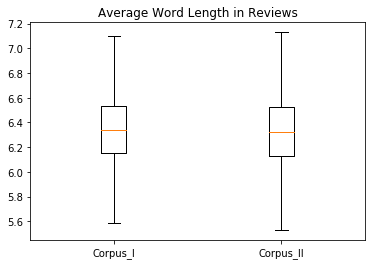

In [52]:
pyplot.boxplot([Corpus_I_mot_moy,Corpus_II_mot_moy],showfliers=False)
pyplot.gca().xaxis.set_ticklabels(["Corpus_I", "Corpus_II"])
pyplot.title('Average Word Length in Reviews')

Text(0.5, 1.0, 'Median Word Length in Reviews')

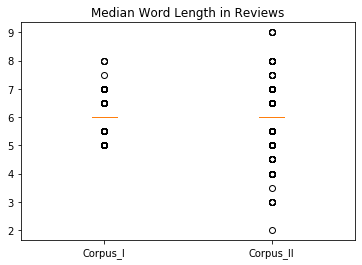

In [53]:
pyplot.boxplot([Corpus_I_mot_med,Corpus_II_mot_med])
pyplot.gca().xaxis.set_ticklabels(["Corpus_I", "Corpus_II"])
pyplot.title('Median Word Length in Reviews')

Text(0.5, 1.0, 'Median Word Length in Reviews')

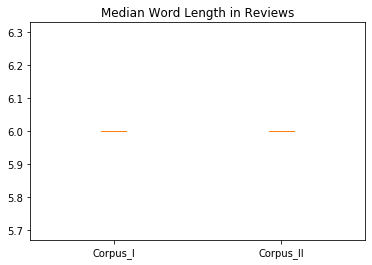

In [54]:
pyplot.boxplot([Corpus_I_mot_med,Corpus_II_mot_med],showfliers=False)
pyplot.gca().xaxis.set_ticklabels(["Corpus_I", "Corpus_II"])
pyplot.title('Median Word Length in Reviews')

Text(0.5, 1.0, 'Minimum Sentence Length in Reviews')

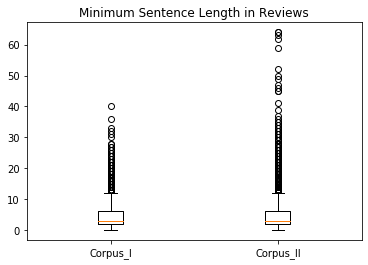

In [55]:
pyplot.boxplot([Corpus_I_phr_min,Corpus_II_phr_min])
pyplot.gca().xaxis.set_ticklabels(["Corpus_I", "Corpus_II"])
pyplot.title('Minimum Sentence Length in Reviews')

Text(0.5, 1.0, 'Minimum Sentence Length in Reviews')

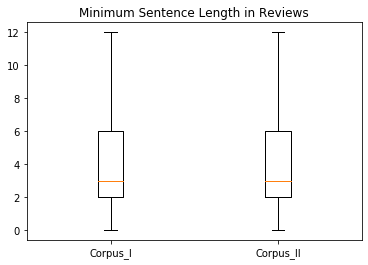

In [56]:
pyplot.boxplot([Corpus_I_phr_min,Corpus_II_phr_min],showfliers=False)
pyplot.gca().xaxis.set_ticklabels(["Corpus_I", "Corpus_II"])
pyplot.title('Minimum Sentence Length in Reviews')

Text(0.5, 1.0, 'Maximum Sentence Length in Reviews')

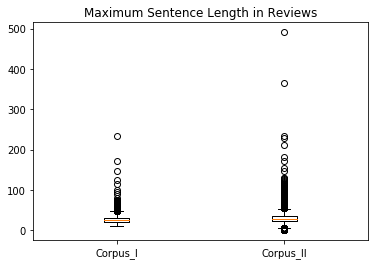

In [57]:
pyplot.boxplot([Corpus_I_phr_max,Corpus_II_phr_max])
pyplot.gca().xaxis.set_ticklabels(["Corpus_I", "Corpus_II"])
pyplot.title('Maximum Sentence Length in Reviews')

Text(0.5, 1.0, 'Maximum Sentence Length in Reviews')

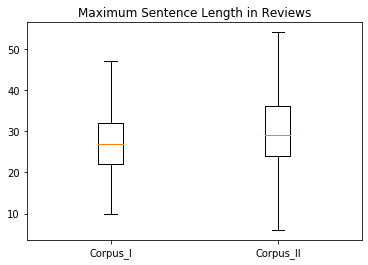

In [58]:
pyplot.boxplot([Corpus_I_phr_max,Corpus_II_phr_max],showfliers=False)
pyplot.gca().xaxis.set_ticklabels(["Corpus_I", "Corpus_II"])
pyplot.title('Maximum Sentence Length in Reviews')

Text(0.5, 1.0, 'Average Sentence Length in Reviews')

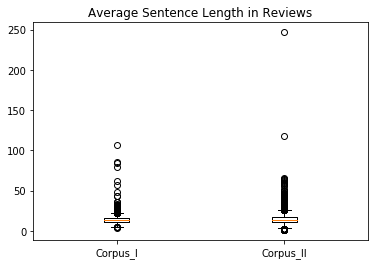

In [59]:
pyplot.boxplot([Corpus_I_phr_moy,Corpus_II_phr_moy])
pyplot.gca().xaxis.set_ticklabels(["Corpus_I", "Corpus_II"])
pyplot.title('Average Sentence Length in Reviews')

Text(0.5, 1.0, 'Average Sentence Length in Reviews')

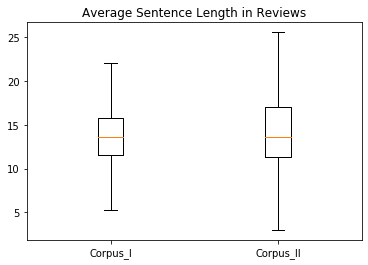

In [60]:
pyplot.boxplot([Corpus_I_phr_moy,Corpus_II_phr_moy],showfliers=False)
pyplot.gca().xaxis.set_ticklabels(["Corpus_I", "Corpus_II"])
pyplot.title('Average Sentence Length in Reviews')

Text(0.5, 1.0, 'Median Sentence Length in Reviews')

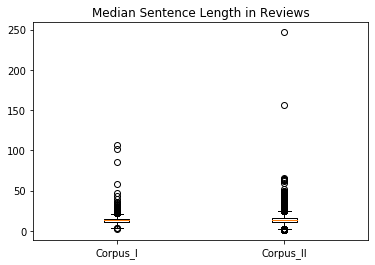

In [61]:
pyplot.boxplot([Corpus_I_phr_med,Corpus_II_phr_med])
pyplot.gca().xaxis.set_ticklabels(["Corpus_I", "Corpus_II"])
pyplot.title('Median Sentence Length in Reviews')

Text(0.5, 1.0, 'Median Sentence Length in Reviews')

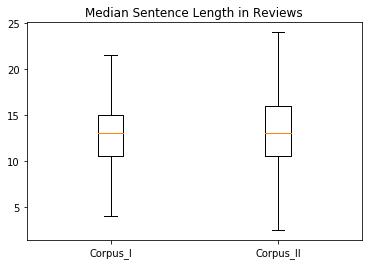

In [62]:
pyplot.boxplot([Corpus_I_phr_med,Corpus_II_phr_med],showfliers=False)
pyplot.gca().xaxis.set_ticklabels(["Corpus_I", "Corpus_II"])
pyplot.title('Median Sentence Length in Reviews')

In [77]:

Corpus_I_mots_uniques = []
Corpus_I_mots_uniques_nostop = []
Corpus_I_ratio_unique = []
Corpus_I_ratio_unique_nostop = []
i = 0
for k in df_corpus_I_v1.axes[0]:
    if pd.isna(df_corpus_I_v1['Review'][k])==False:
        Corpus_I_mots_uniques.append(count_unique_words(df_corpus_I_v1['Review_clean'][k]))
        Corpus_I_mots_uniques_nostop.append(count_unique_words(df_corpus_I_v1['Review_no_stopword'][k]))
        Corpus_I_ratio_unique.append(Corpus_I_mots_uniques[-1]/Corpus_I_nb_mots[i])
        Corpus_I_ratio_unique_nostop.append(Corpus_I_mots_uniques_nostop[-1]/Corpus_I_nb_mots_nostop[i])
        i = i+1

Corpus_II_mots_uniques = []
Corpus_II_mots_uniques_nostop = []
Corpus_II_ratio_unique = []
Corpus_II_ratio_unique_nostop = []
i = 0
for k in df_corpus_II_v1.axes[0]:
    if pd.isna(df_corpus_II_v1['Review'][k])==False:
        if Corpus_II_nb_mots_nostop[i] != 0:
            Corpus_II_mots_uniques.append(count_unique_words(df_corpus_II_v1['Review_clean'][k]))
            Corpus_II_mots_uniques_nostop.append(count_unique_words(df_corpus_II_v1['Review_no_stopword'][k]))
            Corpus_II_ratio_unique.append(Corpus_II_mots_uniques[-1]/Corpus_II_nb_mots[i])
            Corpus_II_ratio_unique_nostop.append(Corpus_II_mots_uniques_nostop[-1]/Corpus_II_nb_mots_nostop[i])
            i = i+1


Text(0.5, 1.0, 'Number of Unique Words in Reviews')

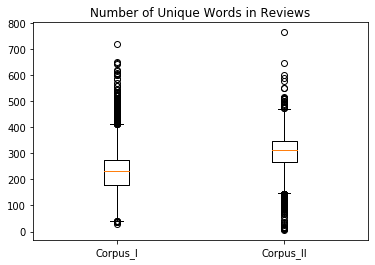

In [78]:
pyplot.boxplot([Corpus_I_mots_uniques,Corpus_II_mots_uniques])
pyplot.gca().xaxis.set_ticklabels(["Corpus_I", "Corpus_II"])
pyplot.title('Number of Unique Words in Reviews')

Text(0.5, 1.0, 'Number of Unique Words in Reviews')

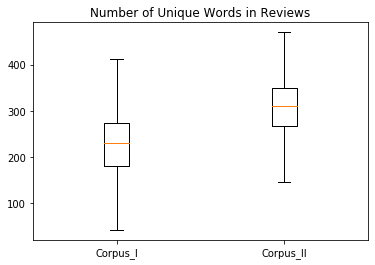

In [79]:
pyplot.boxplot([Corpus_I_mots_uniques,Corpus_II_mots_uniques],showfliers=False)
pyplot.gca().xaxis.set_ticklabels(["Corpus_I", "Corpus_II"])
pyplot.title('Number of Unique Words in Reviews')

Text(0.5, 1.0, 'Number of Unique Words in Reviews (Excluding Stopwords)')

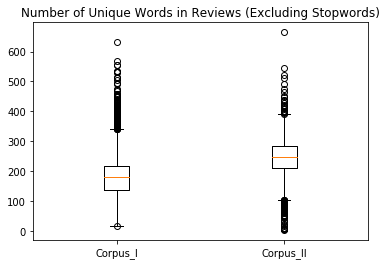

In [80]:
pyplot.boxplot([Corpus_I_mots_uniques_nostop,Corpus_II_mots_uniques_nostop])
pyplot.gca().xaxis.set_ticklabels(["Corpus_I", "Corpus_II"])
pyplot.title('Number of Unique Words in Reviews (Excluding Stopwords)')

Text(0.5, 1.0, 'Number of Unique Words in Reviews (Excluding Stopwords)')

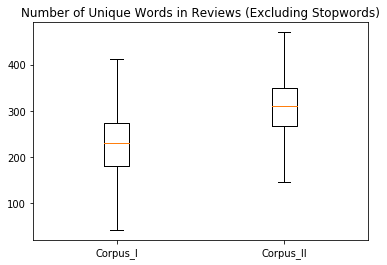

In [81]:
pyplot.boxplot([Corpus_I_mots_uniques,Corpus_II_mots_uniques],showfliers=False)
pyplot.gca().xaxis.set_ticklabels(["Corpus_I", "Corpus_II"])
pyplot.title('Number of Unique Words in Reviews (Excluding Stopwords)')

Text(0.5, 1.0, 'Number of Unique Words / Number of Words')

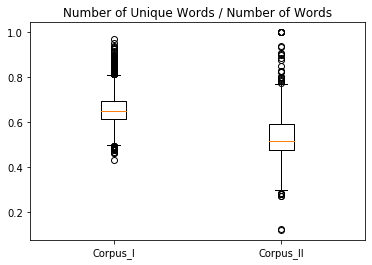

In [82]:
pyplot.boxplot([Corpus_I_ratio_unique,Corpus_II_ratio_unique])
pyplot.gca().xaxis.set_ticklabels(["Corpus_I", "Corpus_II"])
pyplot.title('Number of Unique Words / Number of Words')

Text(0.5, 1.0, 'Number of Unique Words / Number of Words')

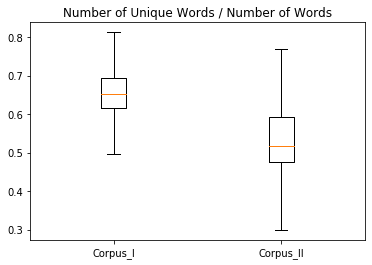

In [83]:
pyplot.boxplot([Corpus_I_ratio_unique,Corpus_II_ratio_unique],showfliers=False)
pyplot.gca().xaxis.set_ticklabels(["Corpus_I", "Corpus_II"])
pyplot.title('Number of Unique Words / Number of Words')

Text(0.5, 1.0, 'Number of Unique Words / Number of Words (Excluding Stopwords)')

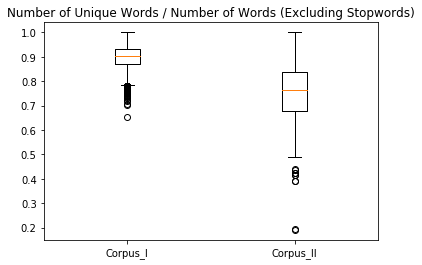

In [84]:
pyplot.boxplot([Corpus_I_ratio_unique_nostop,Corpus_II_ratio_unique_nostop])
pyplot.gca().xaxis.set_ticklabels(["Corpus_I", "Corpus_II"])
pyplot.title('Number of Unique Words / Number of Words (Excluding Stopwords)')

Text(0.5, 1.0, 'Number of Unique Words / Number of Words (Excluding Stopwords)')

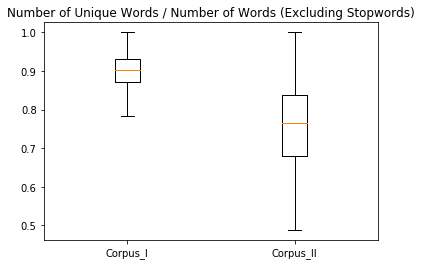

In [85]:
pyplot.boxplot([Corpus_I_ratio_unique_nostop,Corpus_II_ratio_unique_nostop],showfliers=False)
pyplot.gca().xaxis.set_ticklabels(["Corpus_I", "Corpus_II"])
pyplot.title('Number of Unique Words / Number of Words (Excluding Stopwords)')